In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import binom
#font CMU Serif
plt.rcParams.update({'font.family': 'STIXGeneral','font.size':'18','axes.formatter.use_mathtext':'True'})

# binomial distribution
def binomial_pdf(k, n, p):
    return binom.pmf(k, n, p)
# Gaussian function
def gaussian(x, a, mean, std_dev):
    return a * np.exp(- (x - mean)**2 / (2 * std_dev**2))

# Load data from the output.txt file
data = np.loadtxt('../lecture_1/Results/ex_01.1_01.2_output.txt', delimiter=';', skiprows=1)  # Skip the first row (header)
data2 = np.loadtxt('../lecture_1/Results/ex_01_output.2.txt', delimiter=';', skiprows=1)  # Skip the first row (header)
data3 = np.loadtxt('../lecture_1/Results/ex_01_output.3.txt', delimiter=';', skiprows=1)  # Skip the first row (header)
# Extract columns
throws = data[:, 0]
integral_value = data[:, 1]
integral_error = data[:, 2]
sigma_value = data[:, 3]
sigma_error = data[:, 4]
# from the second file:
throws2 = data2[:,0]
chi_square_1 = data2[:, 1]
throws_3 = data3[:, 0]
chi_square_2 = data3[:,1]

# Numerical Simulation Laboratory (NSL)

## Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="grey"> Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ </font>.

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="grey"> Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

## <span style="color:purple"> Solution Exercise 01.1</span>

### Problem's Theory:
- This exercise test the Pseudo-Random Number generator that we will use in Monte Carlo methods. Monte Carlo tecniques are based on stochastic processes whose evolution is characterized by random  events. In a computer the events are always **pseudo** random. Every random number generator algorithm is deterministic so is not Random! It' important that the deterministic code which produce the random sequence of numbers
is statistically uncorrelated with the code which uses it as inpu.
- A subtle problem concerns hidden correlations. Knuth discovered that if you take the numbers produced by a linear congruential generator in groups of k and regard these groups as the coordinates of points in a k-dimensional space, the points produced are constrained to lie on hyper-planes of codimension one in the space. These correlations are certainly well hidden and might not matter in the code, but one must be cautious.
-  Most of the Monte Carlo methods lies on the Cental Limit Theorem. When not-independents variables are considered (for example pseudo random numbers) the theorem is still true if each variable is correlated with a finite number of variables in the sequence.
-  If N is large, the variable $A_N$ $(S_N)$ practically assumes the value $\left<x\right>$, this is the law of large numbers: *the average of the
results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed*
### Problem's approach:
- To solve this Exercise the averages and the uncertainties of the integral's values have been computed with **Monte Carlo statistical sampling** and **blocking method**.
- For each integral i have sampled a probability distribution to apply the blocking method $p(x)$ where $x \in [0,1]$. In the first integral $p(x)=x$ while in second one $p(x)=\left(x-\frac{1}{2}\right)^2$.
- fist of all a random number generator is used to generate $M=100000$ random numbers divided in $N=1000$ blocks, $L=\frac{M}{N}$ is the number of throws in each block.
- With a Monte Carlo samplig is computed the integral value $\bigr(\langle r \rangle = \int_0^1 r dr = 1/2\bigl)$ and the sigma value $\bigr(\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12\bigl)$. To do so is computed the mean value in each block:$$\left<r\right>_{block}=\frac{1}{L}\sum_{J=0}^L r_j:=r_b$$
- secondly the statistical uncertainties are computed using the blocking method: $$\sigma^2_r = \langle r^2 \rangle -\langle r\rangle^2 $$ where $$ \langle r^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N (r_b)^2_i \quad \quad \langle r\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N (r_b)_i \right)^2 $$Finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N (r_b)^2_i - \left( \frac{1}{N} \sum_{i=1}^N (r_b)_i \right)^2 \right]} $$
- In the end is been verified that the pseudo random number generator give a uniform distribution of numbers. To do so is been computed the $$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$ that estimates the probability that $r$ **are not** drawn from a uniform distribution. and is been computed the the probability $p$ of the poisson distribution to verify the approximation $\sigma^2 \simeq \langle X \rangle$

### Code:
```cpp
    // Integral and sigma^2 caluclation
    for(int i=0; i<N;i++){
        //calculation of uncertainty
        sum=0;
        sigma_sum=0;
        for(int j=0;j<L;j++){
        //generate random number
        randomNumbers=rnd.Rannyu();
        //sum of random numbers and sigma^2 generated 
        sum+=randomNumbers;
        sigma_sum+=(randomNumbers-0.5)*(randomNumbers-0.5);
        }
        // Computing the Integral Value with uncertainty
        ave= sum/L;
        av2=ave*ave;
        sum_prog_helper+=ave; // Sum j{0..i} r_j
        su2_prog_helper+=av2; // Sum j{0..i} (r_j)^2
        sum_prog=sum_prog_helper/(i+1); // Cumulative average
        su2_prog=su2_prog_helper/(i+1); // Cumulative square average
        err_prog=error(sum_prog,su2_prog,i); // Statistical uncertainty
        // Computing sigma^2 values with uncertainty
        sigma_ave= sigma_sum/L;
        sigma_av2=sigma_ave*sigma_ave;
        sigma_sum_prog_helper+=sigma_ave; // Sum j{0..i} r_j
        sigma_su2_prog_helper+=sigma_av2; // Sum j{0..i} (r_j)^2
        sigma_sum_prog=sigma_sum_prog_helper/(i+1); // Cumulative average
        sigma_su2_prog=sigma_su2_prog_helper/(i+1); // Cumulative square average
        sigma_err_prog=error(sigma_sum_prog,sigma_su2_prog,i); // Statistical uncertainty
        // Computing Chi^2
        Chi2=(sum_prog-Ei)*(sum_prog-Ei)/Ei;
        ave_Chi2_helper+=Chi2;
        ave_Chi2=ave_Chi2_helper/(i+1);
        prob_poisson=ave_Chi2/N;
        // saving results on output.txt
        throws=(i+1)*L;
        outputFile<<scientific<<setprecision(5)<<throws<<";\t"<<sum_prog<<";\t"<<err_prog<<";\t"<<sigma_sum_prog<<";\t"<<sigma_err_prog<<";\t"<<ave_Chi2<<";\t"<<prob_poisson<<endl;
    }
```
### Plot parameters:
- $N_{blocks} = 10^3$
- $L_{blocks} = 10^4$

### Results:
The integral value and the sigma value obtained are coherent with the expected ones.

### Integral's values
- In a c++ code i have computed the integral's values and the uncertinties with a double loop over the blocks and over the throws in each block. The result obtained are the following. To make the code faster every measure is been computed on the fly and with no vectors.
- We notice, as expected, that mean value and uncertainty and integral error decrease while N become grater. 

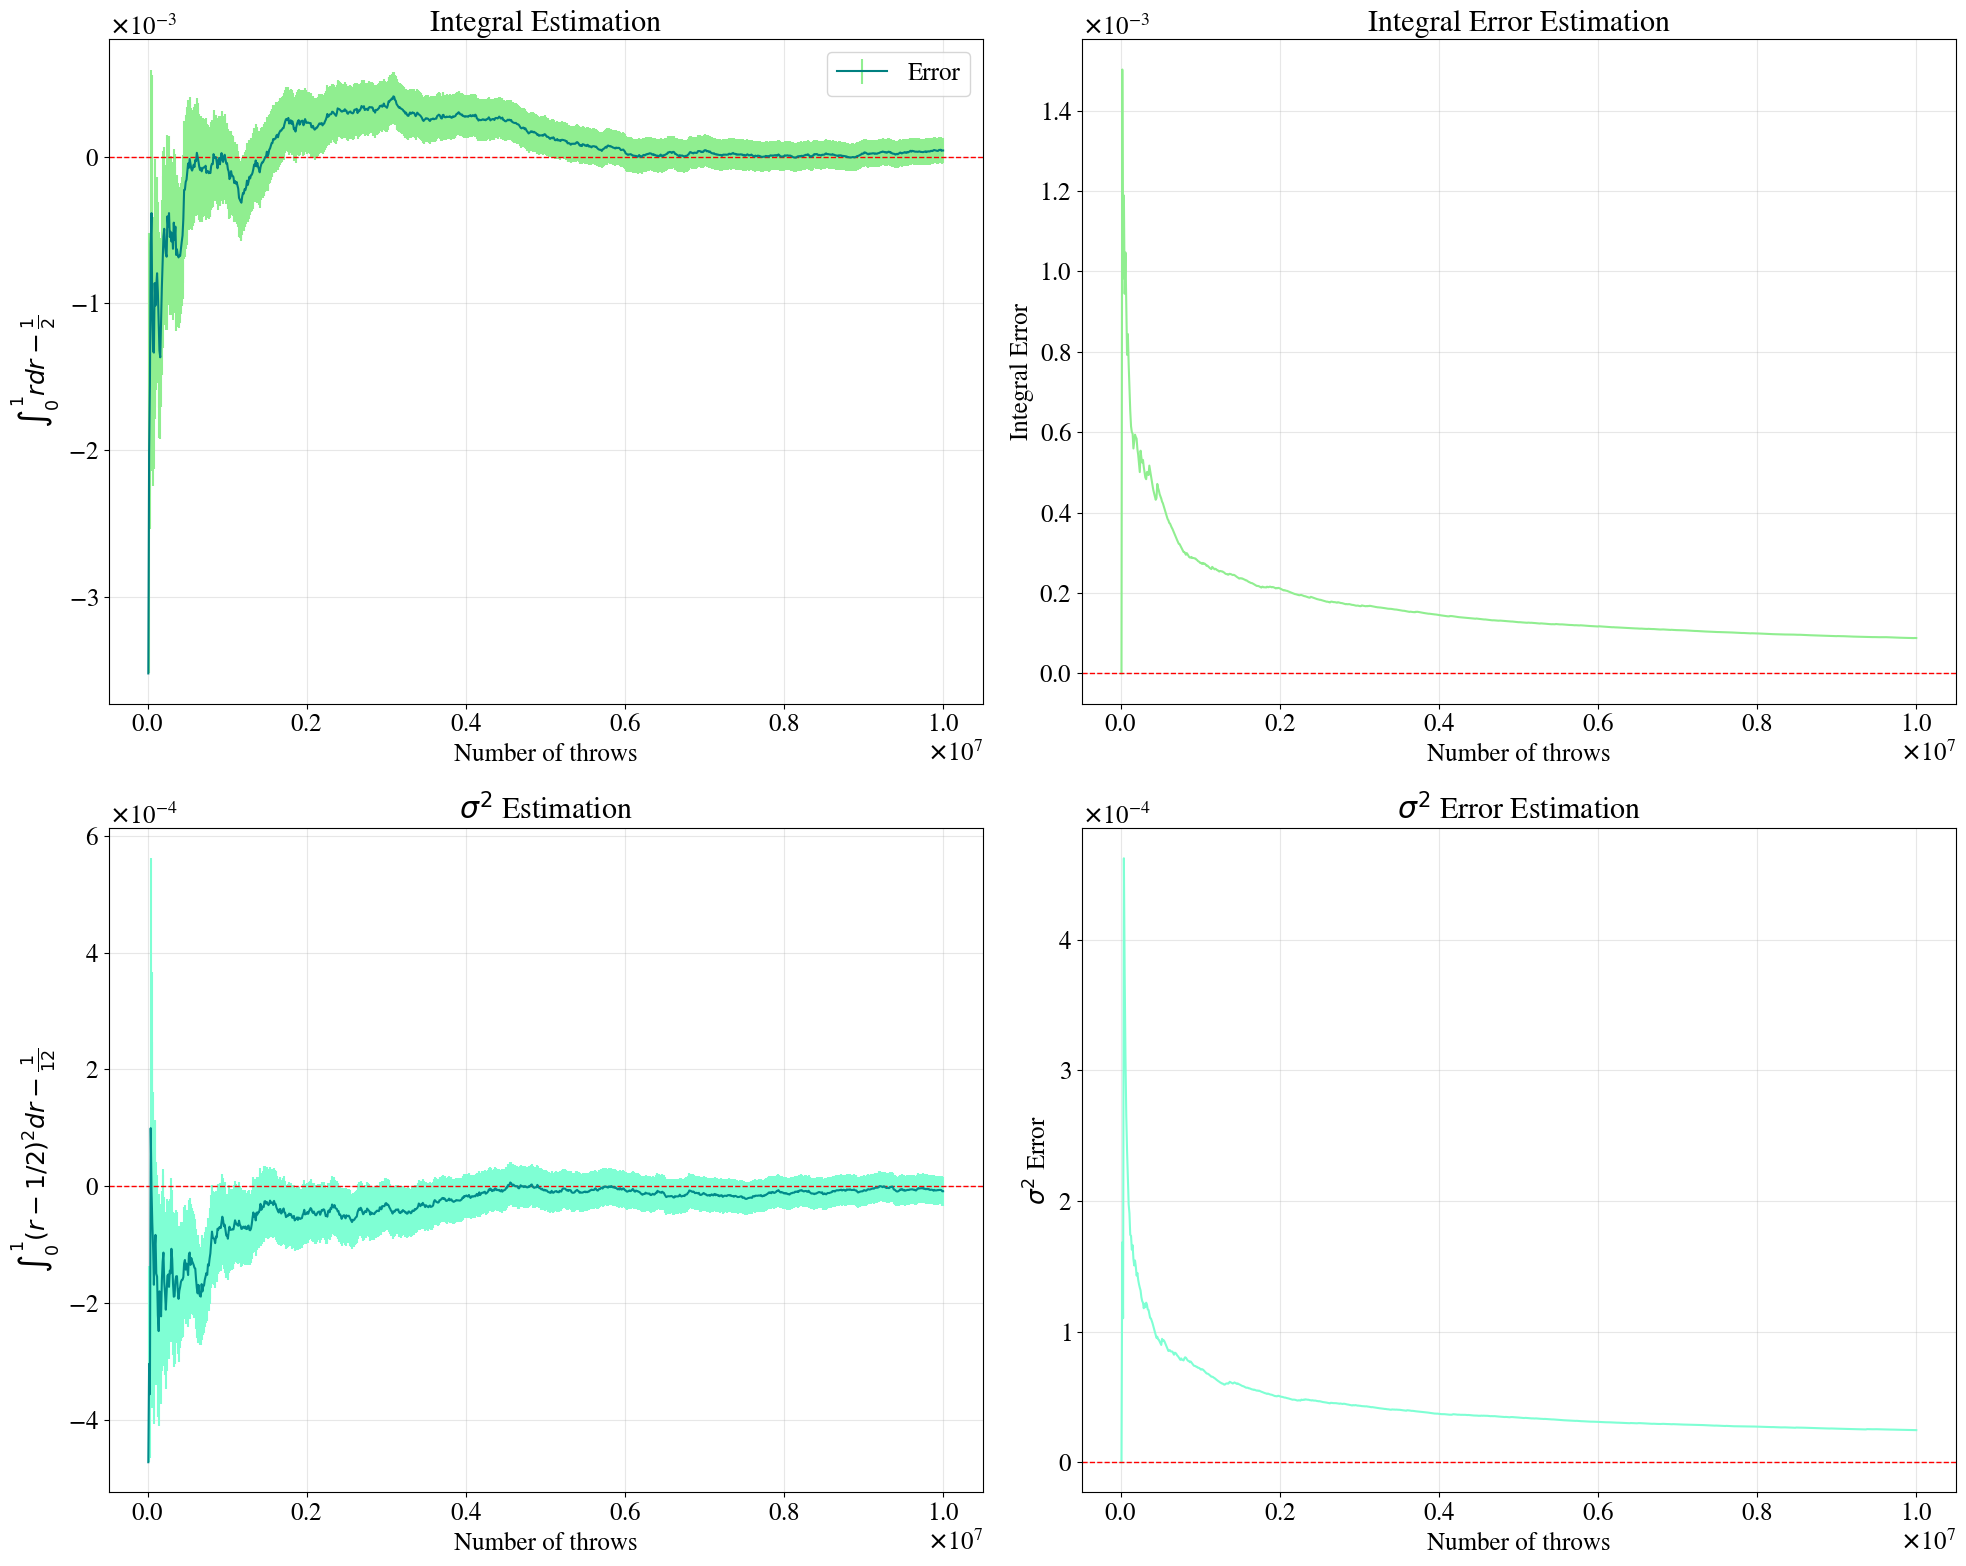

In [4]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
# Plot 1: Number_of_throws vs Integral_value
axs[0, 0].errorbar(throws, integral_value-0.5,color='#008080', yerr=integral_error, label='Error', ecolor='#90ee90',alpha=1)
axs[0, 0].axhline(0, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
axs[0, 0].set_title('Integral Estimation')
axs[0, 0].set_xlabel('Number of throws')
axs[0, 0].set_ylabel(r'$\int_0^1rdr-\frac{1}{2}$')
axs[0, 0].legend()
axs[0, 0].grid(True,alpha=0.3)
axs[0, 0].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
# Plot 2: Number_of_throws vs Integral Error
axs[0, 1].plot(throws, integral_error, label='Integral Error', color='#90ee90')
axs[0, 1].set_title('Integral Error Estimation')
axs[0, 1].axhline(0, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
axs[0, 1].set_xlabel('Number of throws')
axs[0, 1].set_ylabel('Integral Error')
axs[0, 1].grid(True,alpha=0.3)
axs[0, 1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
# Plot 3: Number_of_throws vs Sigma Value
#axs[1, 0].plot(throws, sigma_value-1/12, label='Sigma value', color='blue')
axs[1, 0].errorbar(throws, sigma_value-1/12,color='#008b8b', yerr=sigma_error, label='Error', ecolor='#7fffd4',alpha=1)
axs[1, 0].set_title('$\sigma^2$ Estimation')
axs[1, 0].axhline(0, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
axs[1, 0].set_xlabel('Number of throws')
axs[1, 0].set_ylabel(r'$\int_0^1 (r-1/2)^2 dr-\frac{1}{12}$')
axs[1, 0].grid(True,alpha=0.3)
axs[1, 0].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
# Plot 4: Number_of_throws vs Sigma Error
axs[1, 1].plot(throws, sigma_error, label='Sigma Error', color='#7fffd4')
axs[1, 1].axhline(0, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
axs[1, 1].set_title('$\sigma^2$ Error Estimation')
axs[1, 1].set_xlabel('Number of throws')
axs[1, 1].set_ylabel('$\sigma^2$ Error')
axs[1, 1].grid(True,alpha=0.3)
axs[1, 1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
# Optimize the layout
plt.tight_layout()
# Show the figure
plt.show()


### $\chi^2$
- to estimate the probability that $r_b$ **are not** drawn in a uniform distribution. A big $\chi^2$ means that the **non** uniform distribution hypothesys is rejectable.
- We notice that the  $\chi^2 \approx 100$ and so the distribution is uniform! In addiction, the probability distribution of the $\chi$ values tend to have a gaussian distribution when the number of experiments grows, as we expect from the Central Limit Theorem .
### Code:
```cpp
    for(int k=0;k<iteration;k++){
        //computing Chi^2
        for(int i=0;i<N;i++){
            for(int j=0;j<L;j++){
                randomNumbers=rnd.Rannyu();
                if((static_cast<float>(i)/N) <= randomNumbers && randomNumbers < (static_cast<float>(i + 1)/N)){
                    counter++;
                }
            }
            Chi2_helper=static_cast<double>((counter-(L/N))*(counter-(L/N)))/(L/N);      
            Chi2+=Chi2_helper;
            counter=0;
        }
```
### Plot parameters:
- $N_{blocks} = 100$
- $L_{blocks} = 10^4$
- $N_{iterations} = 100$ in the first two plts and $N_{iterations} = 1000$ in the last two.

### Results:
while in the first two plot the distribution seems to be a Poisson in the last two ones the distribution is gaussian. This result is coherent with the central limit theorem.


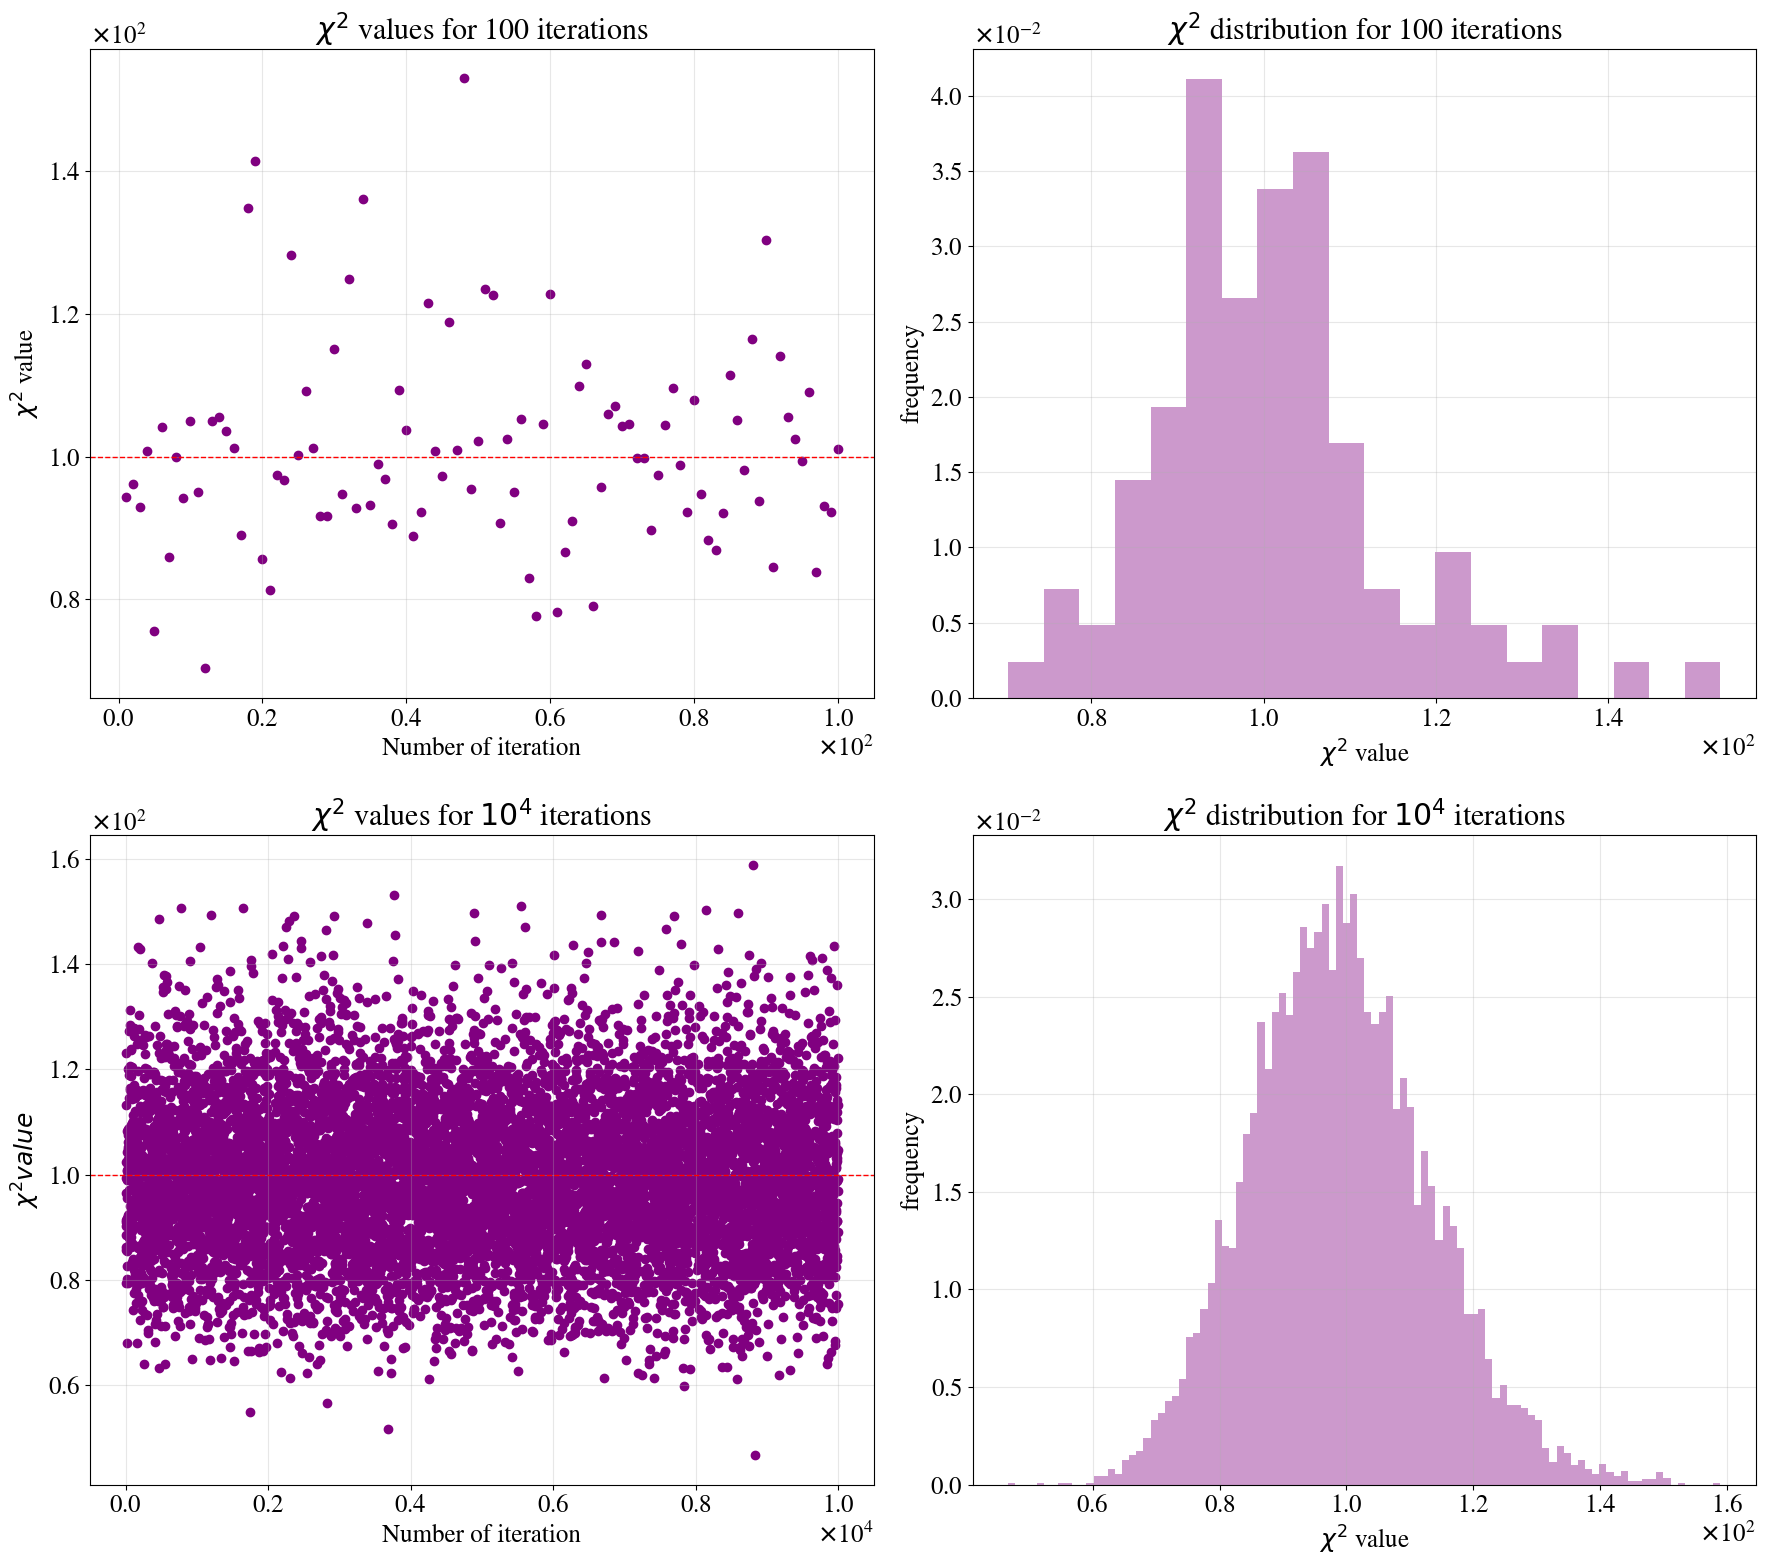

In [5]:
## Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 16))
# Plot 5: N vs Chi^2
axs[0, 0].scatter(throws2, chi_square_1, label='$\chi^2$', color='purple')
axs[0, 0].axhline(100, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
axs[0, 0].set_title('$\chi^2$ values for 100 iterations')
axs[0, 0].set_xlabel('Number of iteration')
axs[0, 0].set_ylabel('$\chi^2$ value')
axs[0, 0].grid(True,alpha=0.3)
axs[0, 0].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
# Plot 6: Number_of_throws vs Poisson Probability
axs[0, 1].hist(chi_square_1,bins=20, label='Poisson Probability', color='purple',alpha=0.4,density=True)
axs[0, 1].set_title('$\chi^2$ distribution for 100 iterations')
axs[0, 1].set_xlabel('$\chi^2$ value')
axs[0, 1].set_ylabel('frequency')
axs[0, 1].grid(True,alpha=0.3)
axs[0, 1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
# Plot 7: Number_of_throws vs Chi2
axs[1, 0].scatter(throws_3,chi_square_2, label='Chi2', color='purple',alpha=1)
axs[1, 0].set_title('$\chi^2$ values for $10^4$ iterations')
axs[1, 0].axhline(100, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
axs[1, 0].set_xlabel('Number of iteration')
axs[1, 0].set_ylabel('$\chi^2 value$')
axs[1, 0].grid(True,alpha=0.3)
axs[1, 0].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
# Plot 7: Number_of_throws vs Poisson Probability
axs[1, 1].hist(chi_square_2,bins=100, label='Poisson Probability', color='purple',alpha=0.4,density=True)
axs[1, 1].set_title('$\chi^2$ distribution for $10^4$ iterations')
axs[1, 1].set_xlabel('$\chi^2$ value')
axs[1, 1].set_ylabel('frequency')
axs[1, 1].grid(True,alpha=0.3)
axs[1, 1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.tight_layout()

## Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. Add two probability distributions >by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, $$p(x) = \lambda \exp(-\lambda x)$$ $x\in [0;+\infty]$ and a **generic** Cauchy-Lorentz distribution $$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$ $x\in [-\infty;+\infty]$.
2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, cauchy
#font CMU Serif
plt.rcParams.update({'font.family': 'STIXGeneral','font.size':'12','axes.formatter.use_mathtext':'True'})

# defining the fitting function
def gauss(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# defining the fitting function
def lorentziana(x, gamma, x0):
    return cauchy.pdf(x, x0, gamma)

# Load data from the output.txt file
uniform = np.loadtxt('../lecture_1/Results/ex_01.2_uniform.txt', delimiter=';', skiprows=1)  # Skip the first row (header)
exp = np.loadtxt('../lecture_1/Results/ex_01.2_exp.txt', delimiter=';', skiprows=1)  # Skip the first row (header)
lorentz = np.loadtxt('../lecture_1/Results/ex_01.2_lorentz.txt', delimiter=';', skiprows=1)  # Skip the first row (header)
# define variables
distributions=[uniform,exp,lorentz]
names_distributions=['Uniform','Exponential','Lorentz']
colors=[['blue','green','red','purple'],['blue','green','red','purple'],['blue','green','red','purple']]
N=[[1,2,10,100],[1,2,10,100],[1,2,10,100]]
ranges=[[(0,1),(0,1),(0.2,0.8),(0.4,0.6)],[(0,8),(0,5),(0,3),(0.5,1.5)],[(-30,30),(-30,30),(-30,30),(-30,30)]]

## <span style="color:purple"> Solution Exercise 01.2</span>
### Problem's theory:
- In this problem is required to sample random numbers with different distributions: uniform, exponential and Cauchy-Lorentz.\
To do so must be used the method of the cumulative distribution's inversion: given a distribution $p(x)$ we can calculate the primitive $F(x)=\int p(x')dx'$. If $F(x)$ is invertible, is possible to generate uniformly $y \in [0,1]$ and then define $x=F_x^{-1}(y)$ as the random variable with problability distribution $p(x)=\frac{dF(x)}{dx}$
### Problem's approach:
- Calculating the primitive and inverting them i have obtained: $$ x_{exp}=-\frac{1}{\lambda}log(1-y) $$  and $$x_{C.L}=\mu + \gamma\cdot tan(\pi (y-0.5)) $$
### Code:
```cpp
double Random :: Exponential(double lambda){
   // This function generates a random number from an exponential distribution with given lambda
   return -log(1.-Rannyu())/lambda;
}

double Random :: CauchyLorentz(double mean, double gamma){
   // This function generates a random number from a Cauchy-Lorentz distribution with given mean and gamma
   return mean + gamma*tan(M_PI*(Rannyu()-0.5));
```
### Plot parameters:
- $N_{realization}=1,2,10,100$
- $N_{repetition}=10^3$
### Results:
- As we can see the uniform and exponential distributions converge to a gaussian,while the Cauchy Lorentz distribution converge to a Cauchy-Lorentz. This is in accordance with the Cetral Limitis Theorem, in fact, if $\sigma < \infty$ the distribution converge to a gaussian for $N \rightarrow \infty$.
- The Cauchy-Lorentz distributions have $\sigma=\infty$ ans so they don't have a gaussian as functional attractor!

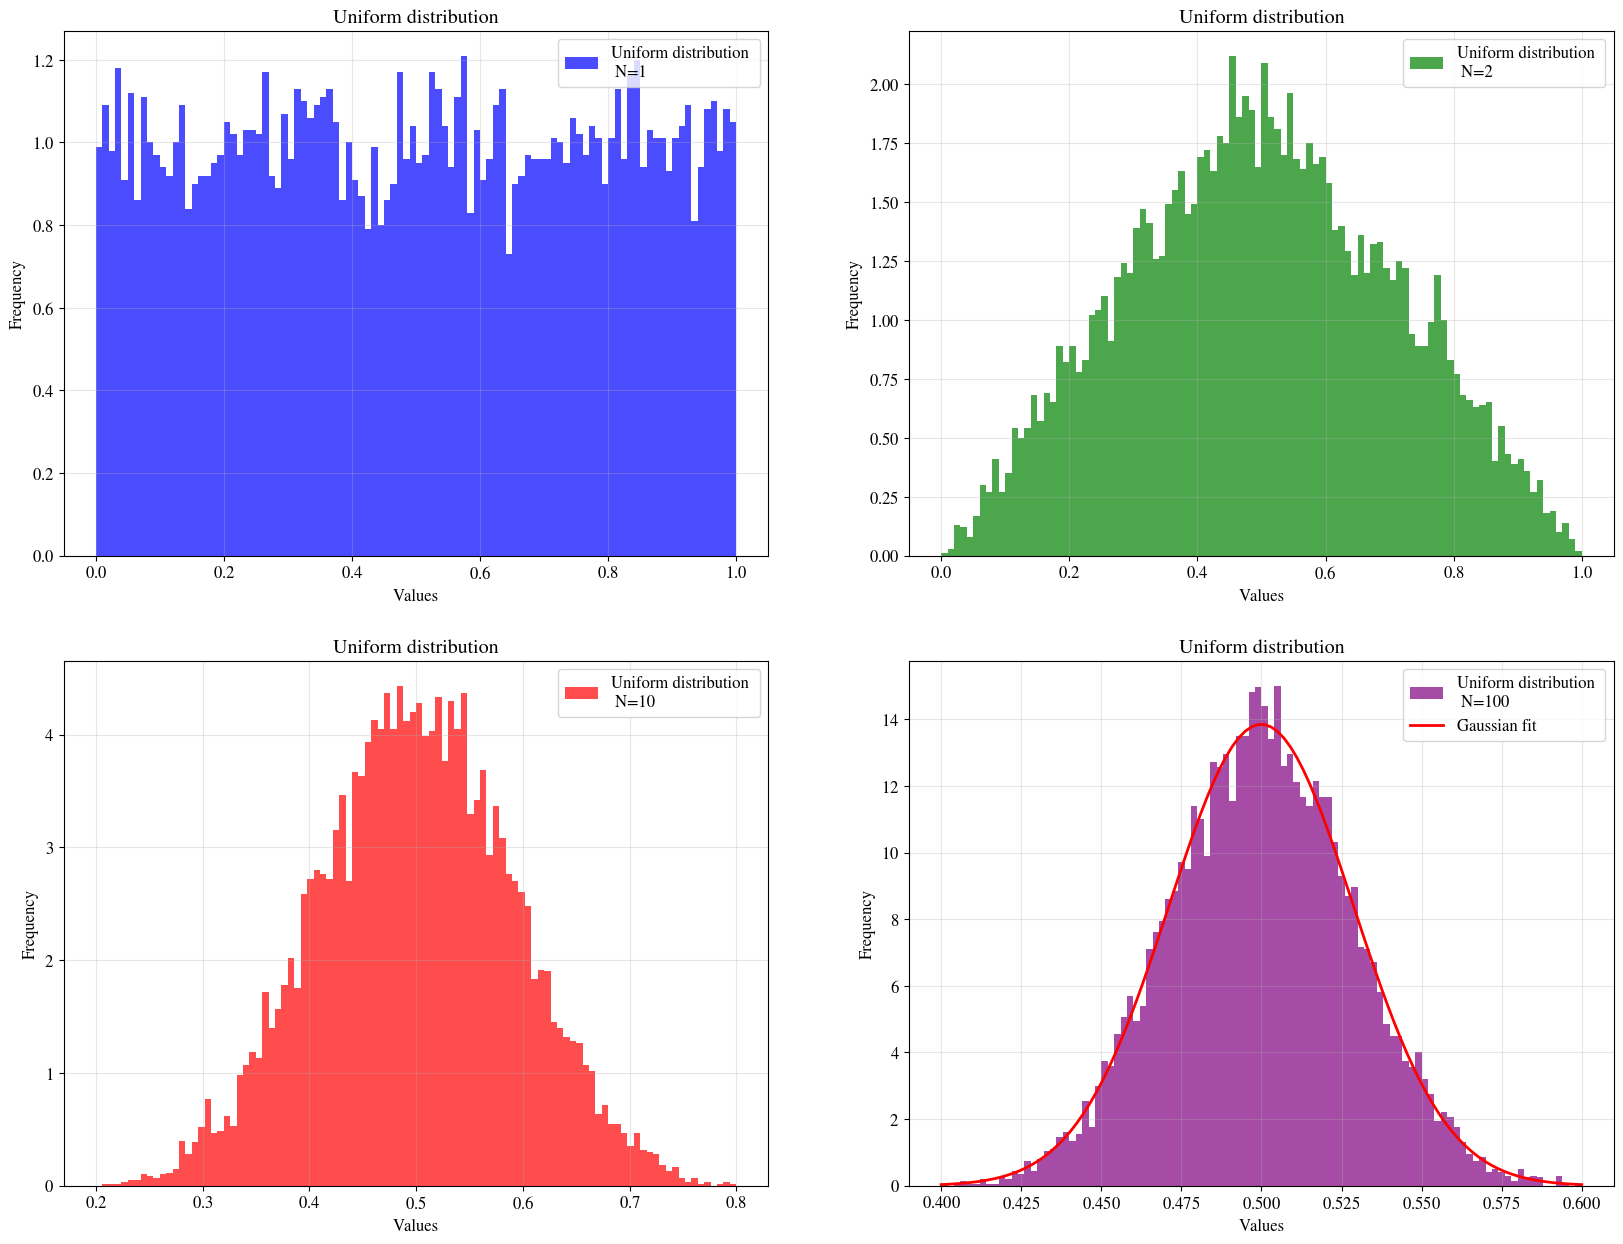

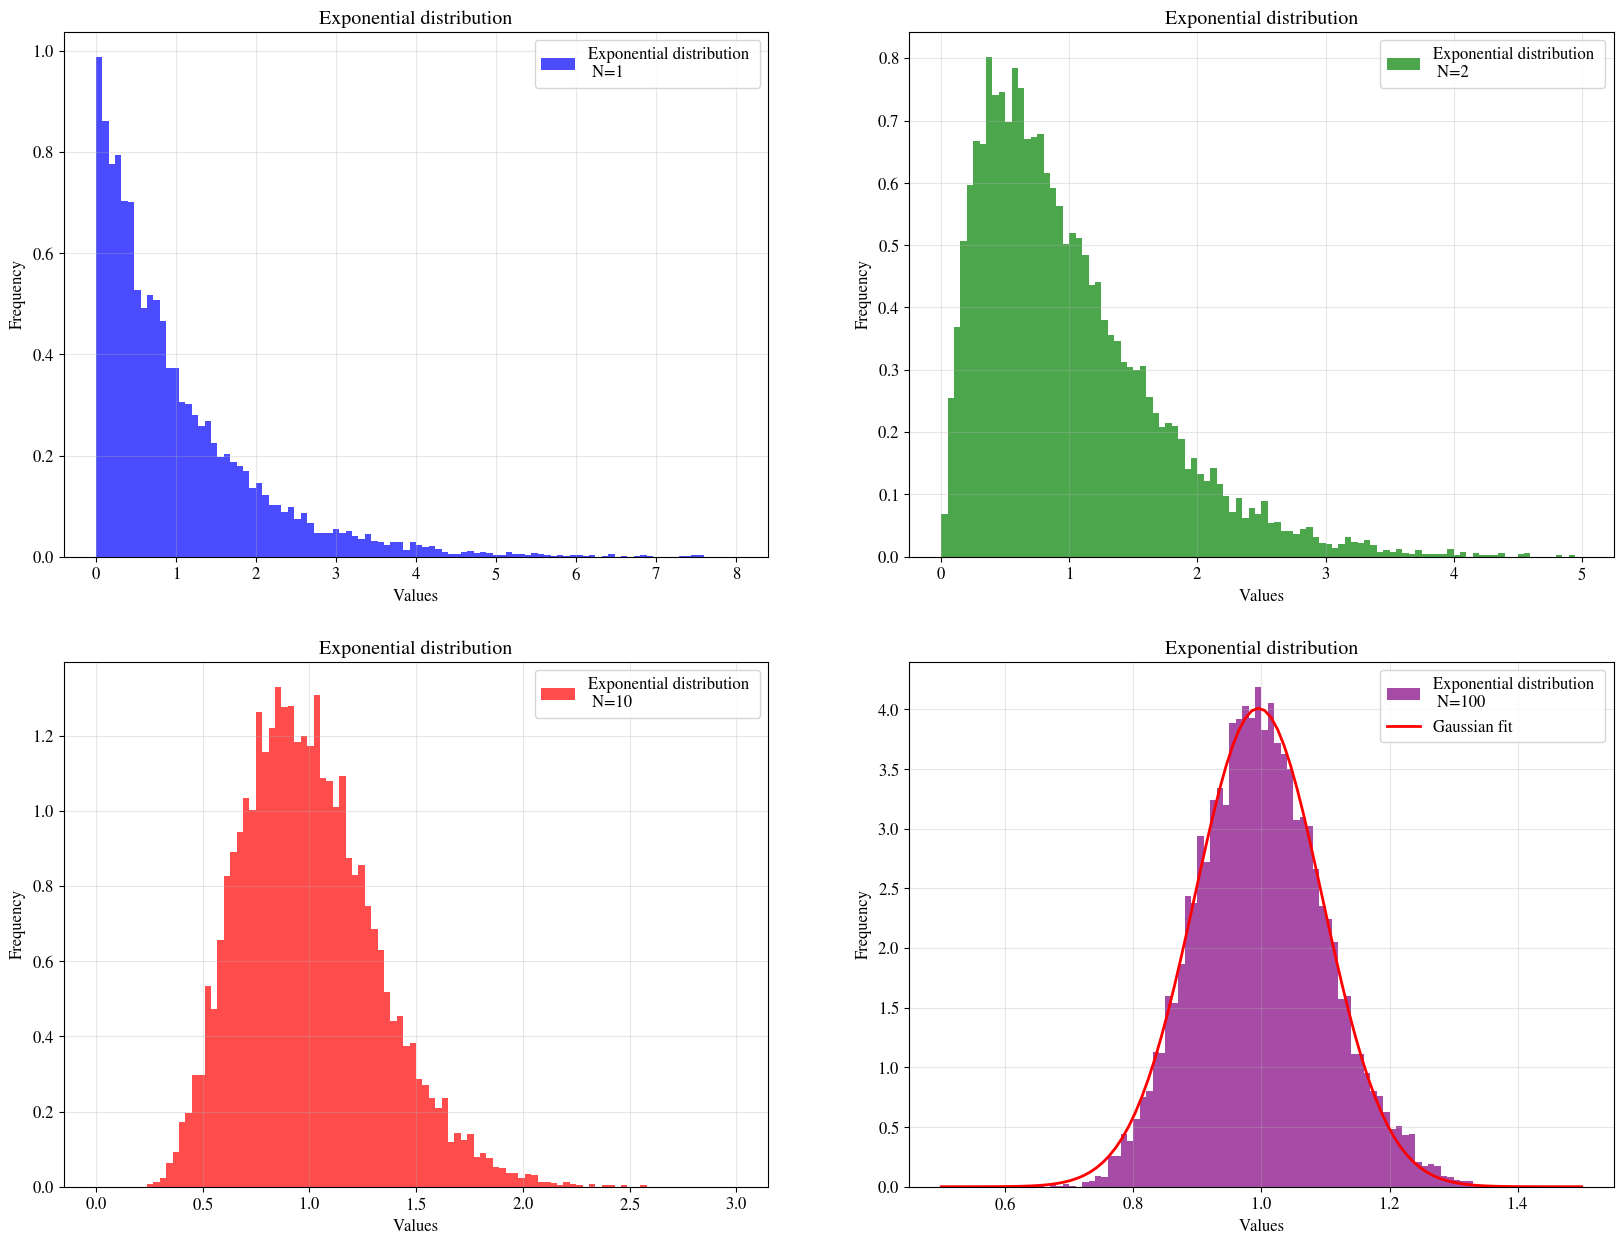

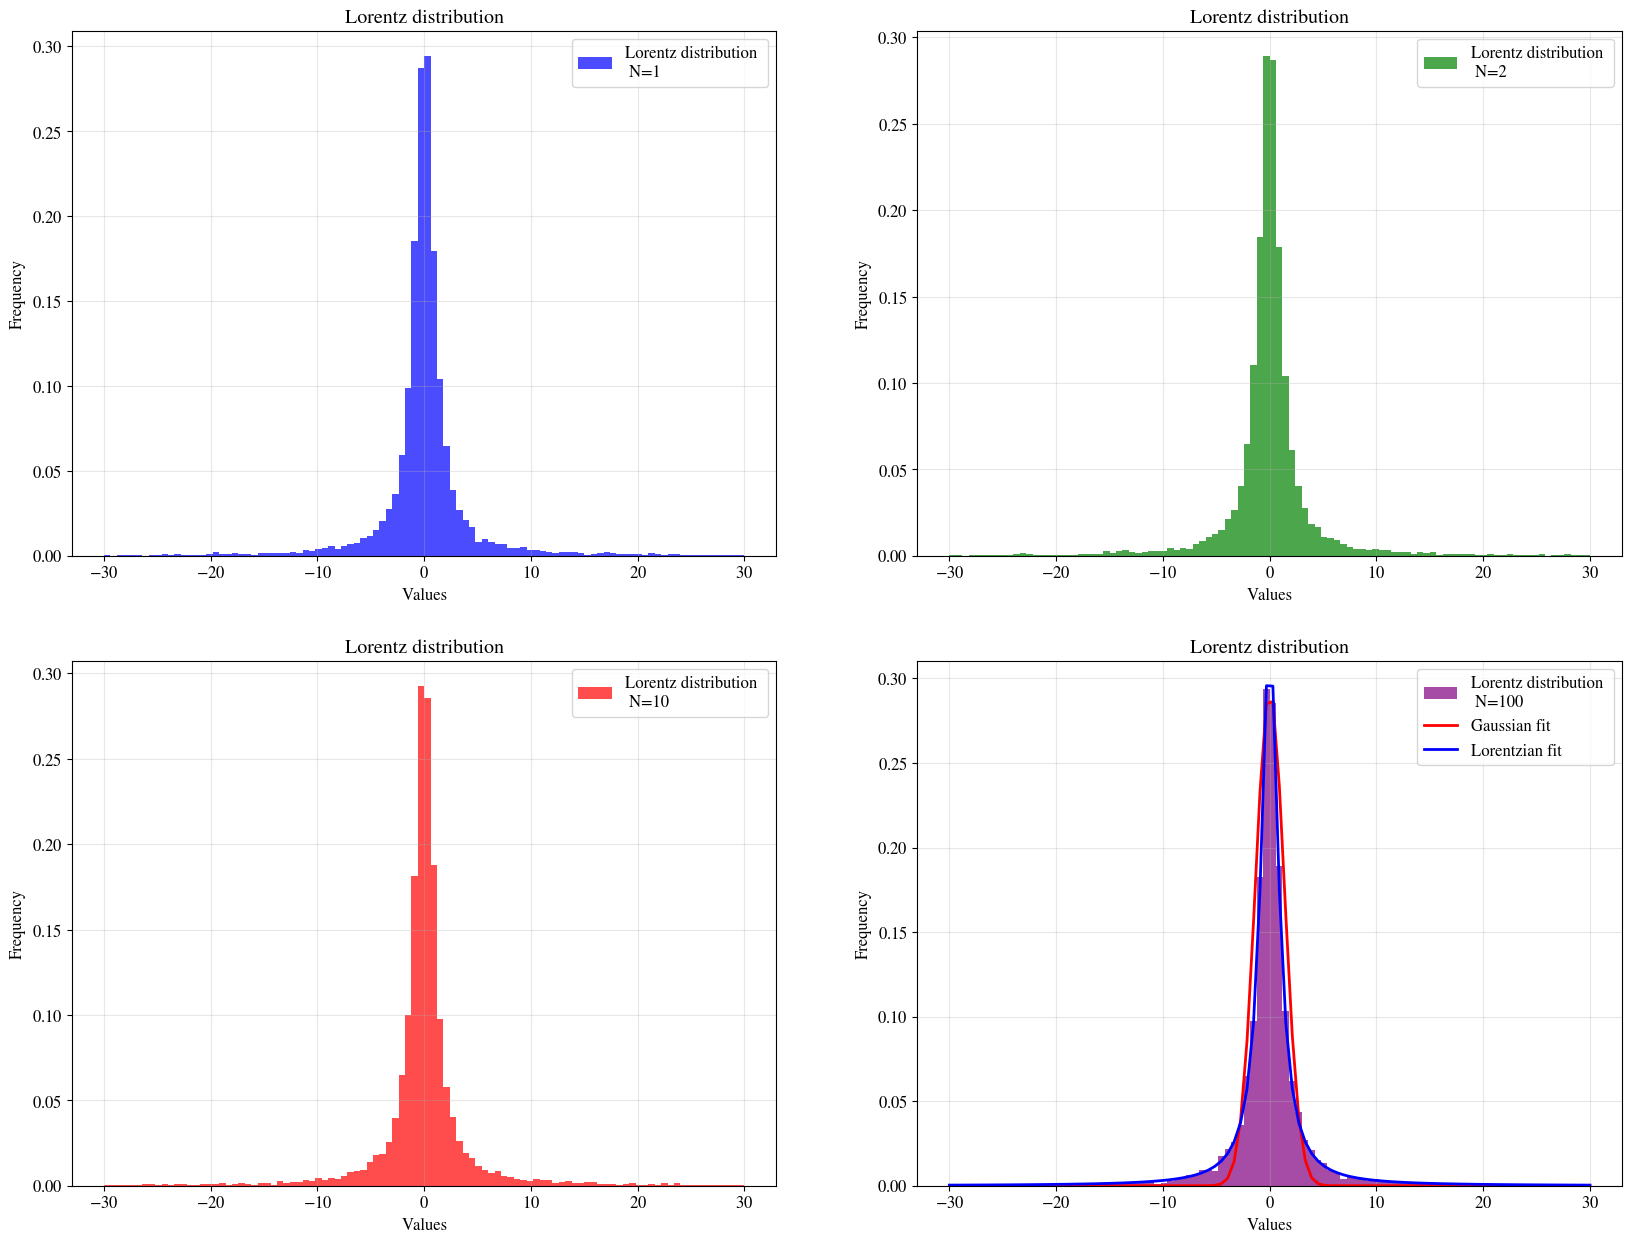

In [10]:
# Create a figure with 4 subplots
for (distribution,name_distribution,colors,N,rangee) in zip(distributions,names_distributions,colors,N,ranges):
    bin=100
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    index=0
    for i in range(2):
        for j in range(2):
    # Plot: uniform, esponential and lorentzian distributions with N=1,2,10,100 
            axs[i,j].hist(distribution[:,index], bins=bin, color=colors[index],range=rangee[index], alpha=0.7, 
                          label=f'{name_distribution} distribution \n N={N[index]}',density=True)
            axs[i,j].set_title(f'{name_distribution} distribution')
            axs[i,j].set_xlabel('Values')
            axs[i,j].set_ylabel('Frequency')
            axs[i,j].legend()
            axs[i,j].grid(True,alpha=0.3)
            
            if (i,j)==(1,1):
                binss = np.linspace(rangee[3][0],rangee[3][1], 10001)
                # Fit the data with a Gaussian function
                data_entries, binss = np.histogram(distribution[:,index], bins = binss, density = True)
                binscenters = np.array([0.5 * (binss[i] + binss[i + 1]) for i in range(len(binss)-1)])
                popt, pcov = curve_fit(gauss, xdata = binscenters, ydata = data_entries)
                xspace = np.linspace(rangee[3][0],rangee[3][1], 100)
                y_fit = gauss(xspace, popt[0], popt[1])
                axs[i,j].plot(xspace, y_fit, color = 'red', linestyle='-', label = 'Gaussian fit',linewidth=2)
                if name_distribution=='Lorentz':
                    # Fit the data with a Lonrentzian function
                    popt, pcov = curve_fit(lorentziana, xdata = binscenters, ydata = data_entries)
                    y_fit = lorentziana(xspace, popt[0], popt[1])
                    axs[i,j].plot(xspace, y_fit, color = 'blue', linestyle='-', label = 'Lorentzian fit',linewidth=2)
            index+=1
    # Optimize the layout
    plt.legend()
    plt.show()


## Exercise 01.3

- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

## <span style="color:purple"> Solution Exercise 01.3</span>
### Problem's approach:
- For this exercise the problem is to sample a disrtribution of $\cos(\phi)$ without using $\pi$. to do so is possible to sample the function in this way: $$\cos(\phi)=\frac{y}{\sqrt{x^2+y^2}}$$ where $x,y \in [0,1]$
### Code:
- with this sample of the cosine we need only to generate randomly the position and the angle of the needle in this way:
```cpp
            //generating the position of the end of the needle
            y=rnd.Rannyu(0,d);
            //generating the angle of the needle
            do{
                lx=rnd.Rannyu(-1,1);
                ly=rnd.Rannyu(-1,1);
            }while((pow(lx,2)+pow(ly,2))>1);
            //calculating the cosine of the angle
            cosphi=ly/sqrt(pow(lx,2)+pow(ly,2));
            //checking if the needle intersects a line
            if((y<d && d<=l*cosphi+y) || (y>0 && y+l*cosphi<=0)){Nhit++;}
```
### Plot parameters:
- $N_{blocks}=100$
- $L_{blocks}=10^6$

### Results:
- In this way i count how much times the needle intersects the line and the ratio $\frac{N_{hit}}{N_{tot}}$ gives me $\pi$ as is shown in the following plot:

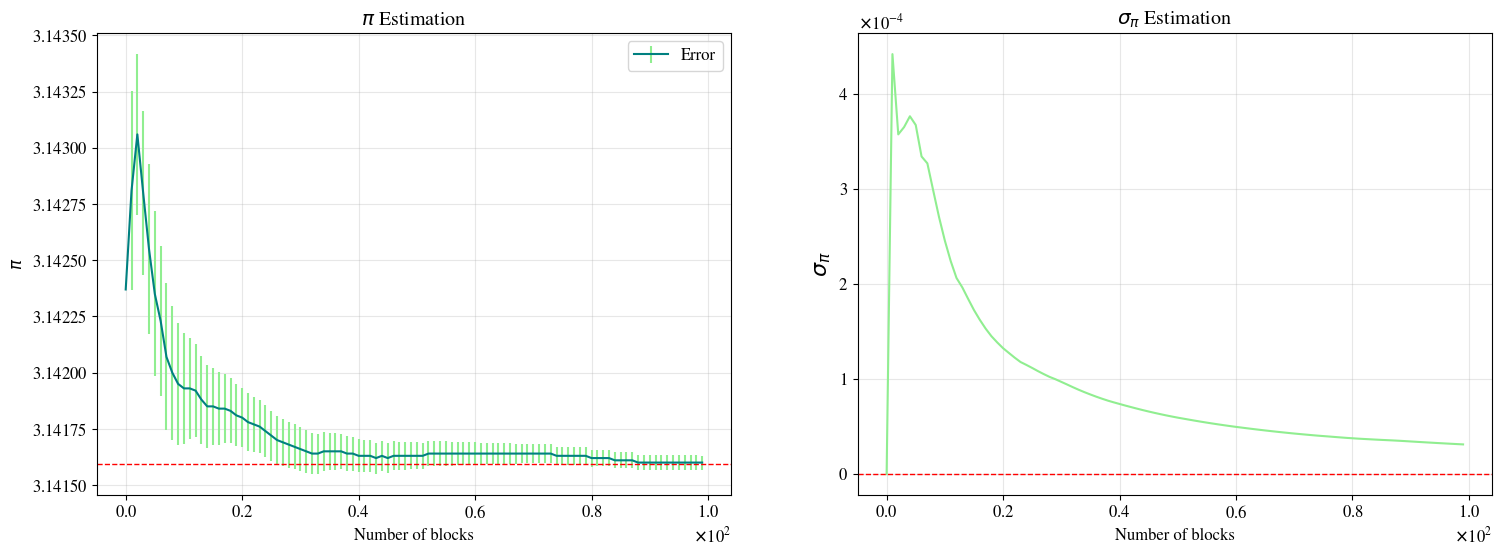

In [11]:
data = np.loadtxt('../lecture_1/Results/ex_01.3_buffon.txt', delimiter=';', skiprows=1)  # Skip the first row (header)
throws = data[:, 0]
pi = data[:, 1]
pi_error = data[:, 2]
# Plot:
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].errorbar(throws, pi,color='#008080', yerr=pi_error, label='Error', ecolor='#90ee90',alpha=1)
ax[0].axhline(3.1415926, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
ax[0].set_title('$\pi$ Estimation')
ax[0].set_xlabel('Number of blocks')
ax[0].set_ylabel(r'$\pi$')
ax[0].legend()
ax[0].grid(True,alpha=0.3)
ax[0].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax[1].plot(throws, pi_error, label='Integral Error', color='#90ee90')
ax[1].axhline(0, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
ax[1].set_title('$\sigma_{\pi}$ Estimation')
ax[1].set_xlabel('Number of blocks')
ax[1].set_ylabel('$\sigma_{\pi}$',fontsize='16')
ax[1].grid(True,alpha=0.3)
ax[1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))